<a href="https://colab.research.google.com/github/ocoropuj/PHYS434/blob/main/PHYS_434_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
# @title Install libraries
!pip install iminuit
!pip install numba_stats

In [2]:
# @title Libraries
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from iminuit import cost, Minuit


# Import Data

In [3]:
#import the csv file data_homework4.csv
df = pd.read_csv('data_homework4.csv')
# Set the value at index 0
df.loc[0] = float(df.columns.tolist()[0])
df = pd.DataFrame(df.values, columns=['Data'])

# Define Basic functions and Initial values

In [4]:
# @title Define the PDF and likelyhood functions
def second_degree_polynomial(x, x0, a, b):
    return x0 + a * x + b * x**2

# Define the likelihood function
def likelihood(a, b):
    expected_counts = second_degree_polynomial(bins0[:-1], x0, a, b)
    expected_counts = expected_counts / np.sum(expected_counts)
    return -np.sum(hist0 * np.log(expected_counts))


In [5]:
# @title Initial Values
# Create a histogram
hist0, bins0 = np.histogram(df['Data'], bins=20, density=True)
# Use the provided initial values
a0 = (hist0[-1] - hist0[0]) / (bins0[-1] - bins0[0])
x0 = (hist0[0])
b0 = 0

# Calculate the values Plot

In [6]:
# @title Generate values
# Create a Minuit object and set initial values and parameter ranges
m = Minuit(likelihood, a=a0, b=b0)

# Perform the MLE fit
m.migrad()

# Print the fit results
print(m.values)
print(m.errors)



<ValueView a=0.23809178461935118 b=0.20721497249107612>
<ErrorView a=0.46201366478341777 b=0.8963034217772213>


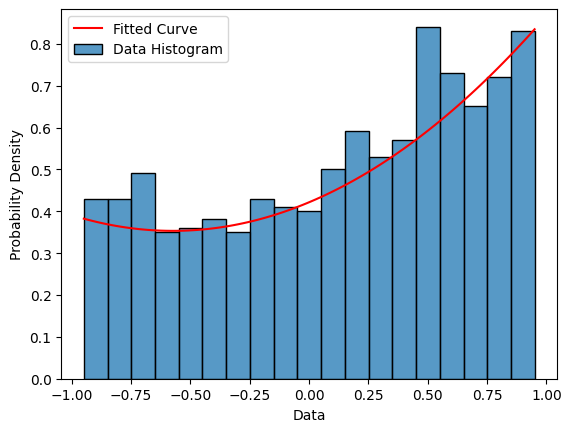

In [7]:
# @title Plot the data and the fitted curve
x_values = np.linspace(bins0[0], bins0[-1], 100)
y_values = second_degree_polynomial(x_values, x0, m.values['a'], m.values['b'])

# Calculate the histogram of the data with a bin width of 0.1
sns.histplot(df['Data'], binwidth=0.1, kde=False, stat='density', label='Data Histogram')

plt.plot(x_values, y_values, 'r-', label='Fitted Curve')
plt.legend()
plt.xlabel('Data')
plt.ylabel('Probability Density')
plt.show()

# Draw Contour Plot of NLL

In [8]:
# @title Calculate the contour values
delta_a = 0.18
delta_b = 0.18
a_range = (m.values['a'] - delta_a, m.values['a'] + delta_a)
b_range = (m.values['b'] - delta_b, m.values['b'] + delta_b)

a_values = np.linspace(a_range[0], a_range[1], 100)
b_values = np.linspace(b_range[0], b_range[1], 100)

# Create a mesh grid of (a, b) values
A, B = np.meshgrid(a_values, b_values)

# Calculate the negative log-likelihood values at each point in the grid
neg_log_likelihood = np.empty_like(A)

for i in range(len(a_values)):
    for j in range(len(b_values)):
        neg_log_likelihood[i][j] = -2 * likelihood(A[i][j], B[i][j])



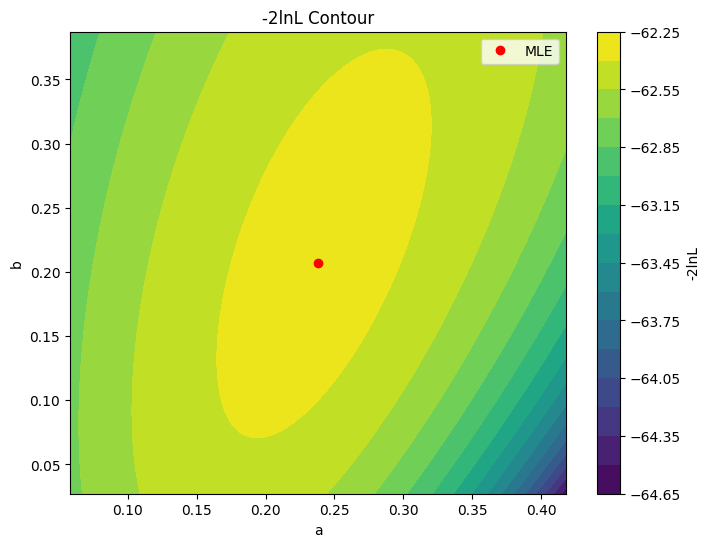

In [9]:
# @title Plot
# Create a continuous filled contour plot
plt.figure(figsize=(8, 6))
contours = plt.contourf(A, B, neg_log_likelihood, levels=20, cmap='viridis')
plt.xlabel('a')
plt.ylabel('b')
plt.title('-2lnL Contour')
plt.colorbar(contours, label='-2lnL')

# Highlight the MLE point
plt.plot(m.values['a'], m.values['b'], 'ro', label='MLE')
plt.legend()

plt.show()